# 01 – Exploratory Data Analysis (EDA)

Goal of this notebook:

- Understand the raw C-MAPSS FD001 dataset.
- Inspect sensor distributions and correlations.
- Visualise engine degradation over cycles.
- Derive initial hypotheses about useful sensors and failure patterns.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sys

# Plot config
plt.style.use("seaborn-v0_8")
sns.set(font_scale=1.1)

project_root = Path.cwd()
repo_root = project_root
for _ in range(6):
    if (repo_root / 'src').exists() or (repo_root / 'requirements.txt').exists():
        break
    if repo_root.parent == repo_root:
        break
    repo_root = repo_root.parent
raw_path = repo_root / 'data' / 'raw' / 'train_FD001.txt'
print('Repository root:', repo_root)
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))
raw_path


Repository root: /Users/arnavthakur/Documents/Data Science Projects/Industrial_Equipment_Failure_Prediction


PosixPath('/Users/arnavthakur/Documents/Data Science Projects/Industrial_Equipment_Failure_Prediction/data/raw/train_FD001.txt')

In [5]:
from src.data_loading import load_cmapps_fd001

df_raw = load_cmapps_fd001(raw_path)
df_raw.head()


,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_12,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [6]:
df_raw.shape, df_raw.dtypes.head()
df_raw.describe().T.head(20)


,count,mean,std,min,25%,50%,75%,max
unit,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
cycle,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
s_1,20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
s_2,20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
s_3,20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
s_4,20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
s_5,20631.0,14.620000,5.329200e-15,14.6200,14.6200,14.6200,14.6200,14.6200


In [7]:
df_raw.isna().sum()
n_units = df_raw["unit"].nunique()
cycles_per_unit = df_raw.groupby("unit")["cycle"].max()

n_units, cycles_per_unit.describe()


(100,
 count    100.000000
 mean     206.310000
 std       46.342749
 min      128.000000
 25%      177.000000
 50%      199.000000
 75%      229.250000
 max      362.000000
 Name: cycle, dtype: float64)

### Engine degradation – examples

We want to see how sensor values evolve as the engine approaches failure.


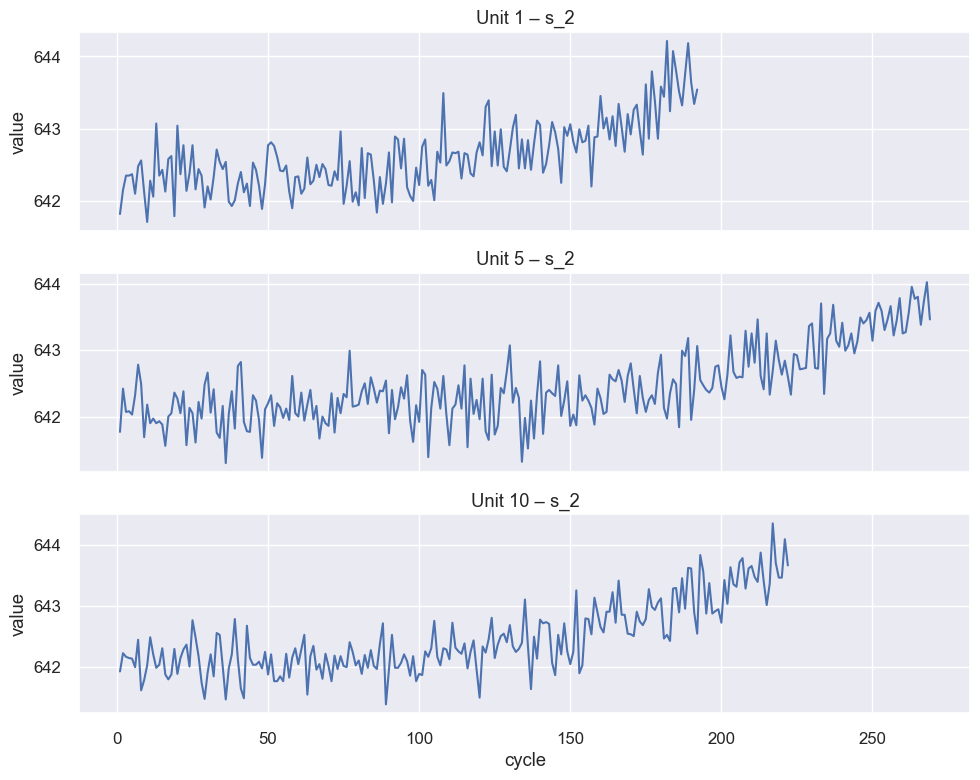

In [8]:
sensor = "s_2"  # you can try different sensors
sample_units = [1, 5, 10]

fig, axes = plt.subplots(len(sample_units), 1, figsize=(10, 8), sharex=True)

for ax, u in zip(axes, sample_units):
    df_u = df_raw[df_raw["unit"] == u].sort_values("cycle")
    ax.plot(df_u["cycle"], df_u[sensor])
    ax.set_title(f"Unit {u} – {sensor}")
    ax.set_ylabel("value")

axes[-1].set_xlabel("cycle")
plt.tight_layout()
plt.show()


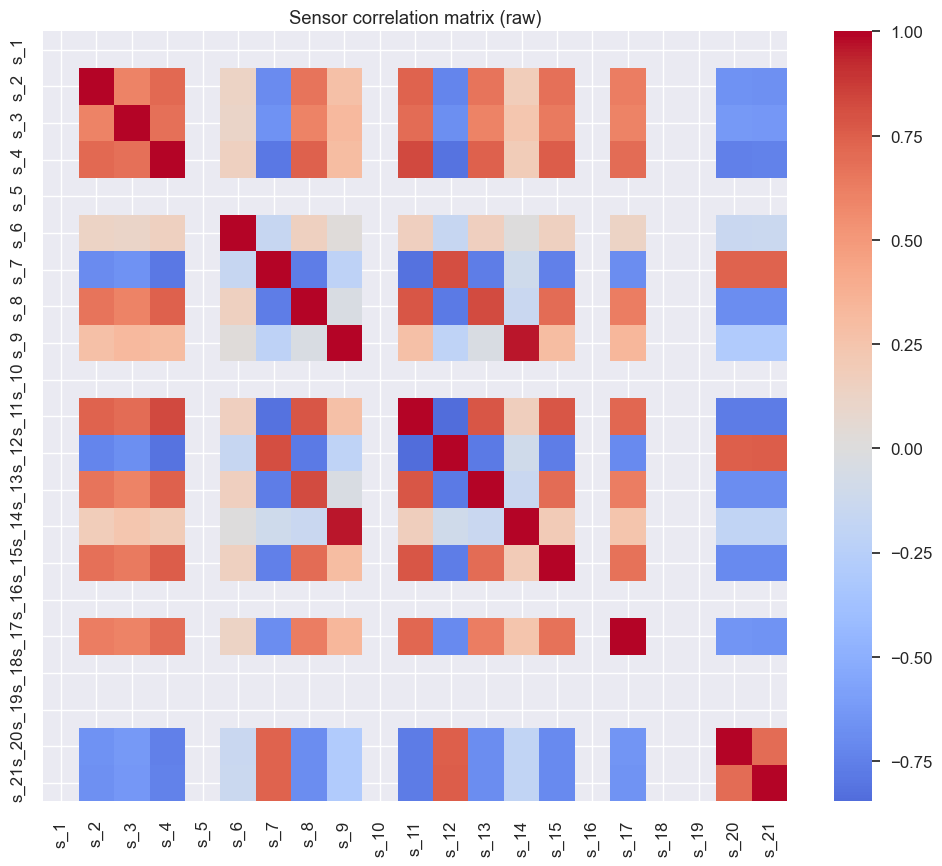

In [9]:
sensor_cols = [c for c in df_raw.columns if c.startswith("s_")]

corr = df_raw[sensor_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Sensor correlation matrix (raw)")
plt.show()


In [10]:
from src.data_loading import add_rul

df_rul = add_rul(df_raw)
df_rul.head()


,unit,cycle,setting_1,setting_2,setting_3,s_1,s_2,s_3,s_4,s_5,...,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_20,s_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


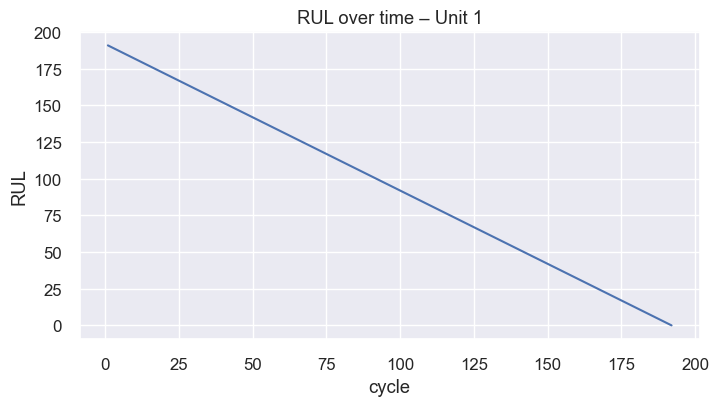

In [11]:
df_rul["RUL"].describe()
# RUL over cycles for a single unit
u = 1
df_u = df_rul[df_rul["unit"] == u].sort_values("cycle")

plt.figure(figsize=(8, 4))
plt.plot(df_u["cycle"], df_u["RUL"])
plt.xlabel("cycle")
plt.ylabel("RUL")
plt.title(f"RUL over time – Unit {u}")
plt.show()
